# Library

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Gulim')
import warnings
warnings.filterwarnings(action='ignore')

# EDA

## Data Load

In [2]:
wine_original = pd.read_csv("./data/winequality-red.csv")
wine = pd.read_csv("./data/winequality-red.csv")

## Data Description

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### **산도** 
[유기산 → 풍미에 중요한 역할]
- fixed acidity (결합산, 고정산도) - 산의 농도에 90% 이상 차지 <br>
주로 타르타르산, 사과산 으로 이루어져 있으며 와인의 산도 제어 → 함량이 적을수록 좋음. <br>
타르타르산, 주석산 (tartaric acid) - 가장 비중이 큼 <br>
와인에서 가장 중요한 산으로 포도에만 다량 존재하는 산. <br>
pH에 밀접한 영향을 미침 <br>
와인을 마실 때 좋지 않은 감촉을 유발하므로 될 수 있으면 제거하는 편이 좋음. <br>
<br>
사과산 (malic acid) <br>
주석산에 비해 불안정하며 쉽게 다른 물질로 변하기 때문에 완성된 와인에는 사과 <br>
산이 적을수록 안정성이 높음. <br>
알코올 발효를 거치면, 맛이 부드러워지고 품질이 개선됨. <br>


- citric acid (구연산, 시트르산 수치) - 약한 유기산, 산의 농도에 거의 영향 X <br>
와인의 신선함을 올려주는 역할, 산성화에 밀접한 연관을 미침. <br>
소량으로 발견되는 구연산은 와인에 신선함과 풍미를 더해줌. <br>
<br>

[휘발성 산 → 향미 성분]
- volatile acidity (휘발성 산) <br>
와인의 향과 연관, 낮을 수록 좋음. <br>
과일향이 가득한 와인인지, 식초가 되는 과정으로 넘어가는지 판가름할 수 있는 기준 <br>
<br>

### **당**
- residual sugar (잔여 설탕) <br>
발효 후 잔류하는 설탕의 양 <br>
와인의 단맛을 올려줌<br>
<br>

### **염분**
-  chlorides (염화물, 소금 함유량) <br>
와인에 들어있는 소금의 양. <br>
와인의 짠맛의 원인. 와인의 신맛을 좌우하는 성분. <br>

<br>

### **품질 유지**
[이산화황 관련]
-  free sulfur dioxide (유리 이산화황) <br>
자유형태의 SO2 (산소 포화도 : 산소와 결합한 비율) <br>
원하지 않는 박테리아와 효모를 죽여 와인을 오래 보관하는 역할. <와인의 보관도를 높여줌> <br>
→ 분자, 미생물 성장과 포도주의 산화 방지 <br>
<br>
- total sulfur dioxide (총 이산화황) <br>
저농도에서는 거의 검출되지 않지만, 50ppm 이상의 SO2 농도에서는 와인의 향에 영향을 미침. <br>


- sulphates (황산염) <br>
SO2 수준에 기여할 수 있는 와인 첨가제로서, 항균 및 항산화 작용.


### **농도**
- density(수분 밀도) : 와인의 밀도, 무게감
<br>

### **산미**
- pH (산성도, 수소 이온 지수) <br>
산의 강도 혹은 해리도를 나타내는 지표로서 수소이온 농도를 뜻함. <br>
향미, 색, 미생물학적 안정성, 단백질 안정성, 산화, 아황산 첨가량에 직접 영향을 미침 <br>
와인의 pH는 2.8-4.0의 범위로서 수치가 낮을수록 미생물에 대한 저항력은 강해지지만, 신맛도 강해짐. <br>
pH가 낮을수록 향이 좋아지며 신선한 맛이 나고, 발효가 진행되어 더 좋은 와인을 만들 수 있음. <br>
이상적인 pH : 3.4 이하 (레드 와인) <br>


### 알코올
- alcohol(알코올 도수) : 와인의 알콜 함량 퍼센트. <br>
함량이 높을수록 와인에 단맛을 주고, 매끄러운 바디감을 줌. <br>

### 종속변수
- quality(품질) : 감각 데이터를 기반으로 0~10 등급 (종속변수)
<br>

# 1. Preprocessing

### - Rename

In [5]:
for i in wine.columns:
    wine = wine.rename({i:i.replace(" ","_")}, axis=1)

In [6]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Quality (종속변수)

In [7]:
wine['quality'] = wine['quality'].astype("category") #범주형 변수로 변환
wine_original['quality'] = wine_original['quality'].astype("category")

In [8]:
wine["quality"].value_counts(sort=False)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

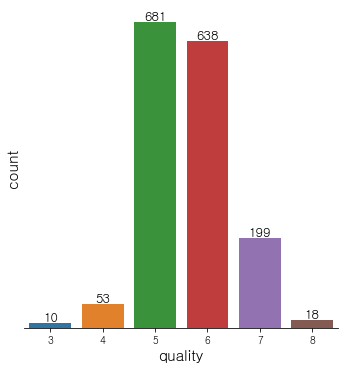

In [9]:
sns.catplot(data=wine, x="quality", kind="count")

for i in range(0,6):
    plt.annotate(str(wine["quality"].value_counts(sort=False)[i]), 
                 xy=(i,wine["quality"].value_counts(sort=False)[i]), ha='center', va='bottom', size=13)

plt.xlabel("quality",size=15)
plt.ylabel("count",size=15)

sns.despine(left=True)
plt.tick_params(left = False, labelleft = False)

plt.show()

### fixed.acidity(고정 산도)

In [10]:
wine["fixed_acidity"].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

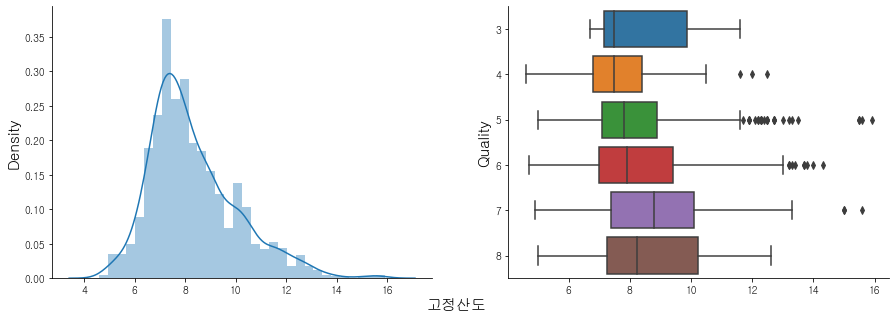

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["fixed_acidity"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="fixed_acidity", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '고정산도', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)


plt.show()

#### 이상치 제거

In [12]:
def remove_outlier_using_IQR(df, col):
    for i in range(3,9):
        Q1 = df.loc[df.quality==i][col].quantile(0.25)
        Q3 = df.loc[df.quality==i][col].quantile(0.75)
        IQR = Q3-Q1
        df.drop(df.loc[((df[col]<Q1-1.5*IQR)|(df[col]>Q3+1.5*IQR)) & (df.quality==i)].index, inplace=True)

In [13]:
remove_outlier_using_IQR(wine, "fixed_acidity")

### volatile.acidity(휘발성 산도)

In [14]:
wine["volatile_acidity"].describe()

count    1558.000000
mean        0.529695
std         0.180044
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile_acidity, dtype: float64

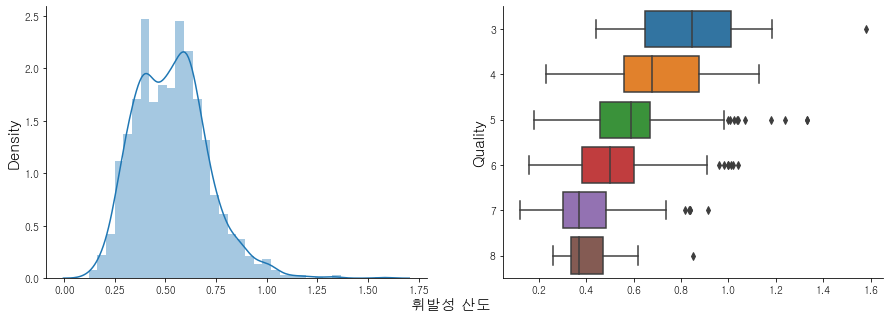

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["volatile_acidity"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="volatile_acidity", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '휘발성 산도', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [16]:
remove_outlier_using_IQR(wine, "volatile_acidity")

### citric.acid(구연산)

In [17]:
wine["citric_acid"].describe()

count    1534.000000
mean        0.265300
std         0.190531
min         0.000000
25%         0.090000
50%         0.250000
75%         0.410000
max         1.000000
Name: citric_acid, dtype: float64

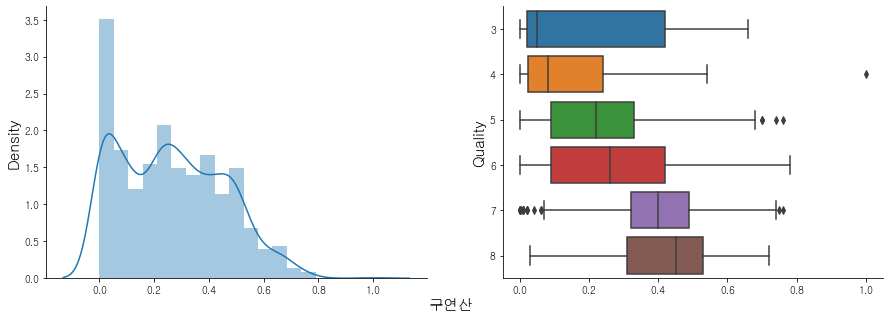

In [18]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["citric_acid"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="citric_acid", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '구연산', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [19]:
remove_outlier_using_IQR(wine, "citric_acid")

### residual.sugar(잔류 설탕)

In [20]:
wine["residual_sugar"].describe()

count    1508.000000
mean        2.534947
std         1.423859
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual_sugar, dtype: float64

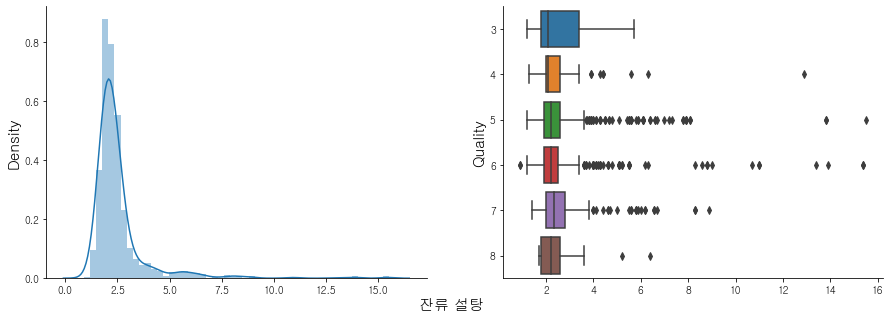

In [21]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["residual_sugar"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="residual_sugar", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '잔류 설탕', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

In [22]:
wine["residual_sugar"]=np.log(wine.residual_sugar)

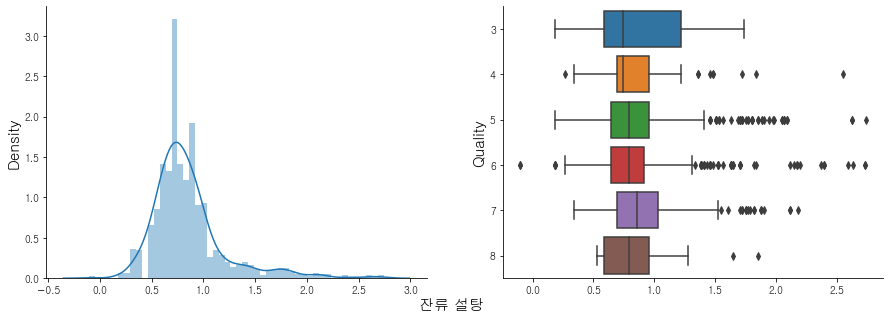

In [23]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["residual_sugar"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="residual_sugar", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '잔류 설탕', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [24]:
remove_outlier_using_IQR(wine, "residual_sugar")

### chlorides(염화물)

In [25]:
wine["chlorides"].describe()

count    1386.000000
mean        0.086765
std         0.043837
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.467000
Name: chlorides, dtype: float64

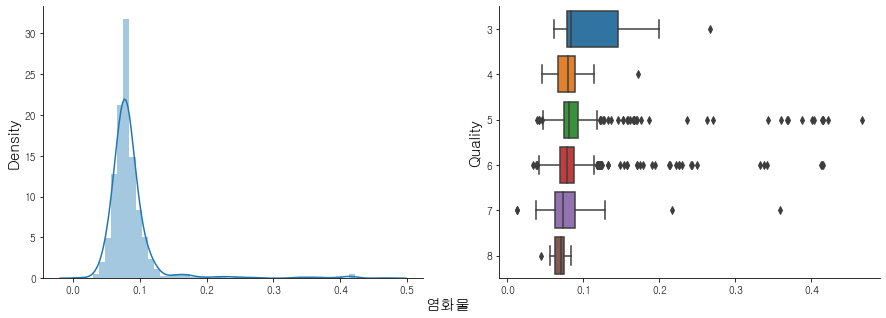

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["chlorides"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="chlorides", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '염화물', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [27]:
remove_outlier_using_IQR(wine, "chlorides")

### free.sulfur.dioxide(이산화 아황)

In [28]:
wine["free_sulfur_dioxide"].describe()

count    1293.000000
mean       15.861949
std         9.690433
min         1.000000
25%         8.000000
50%        14.000000
75%        21.000000
max        54.000000
Name: free_sulfur_dioxide, dtype: float64

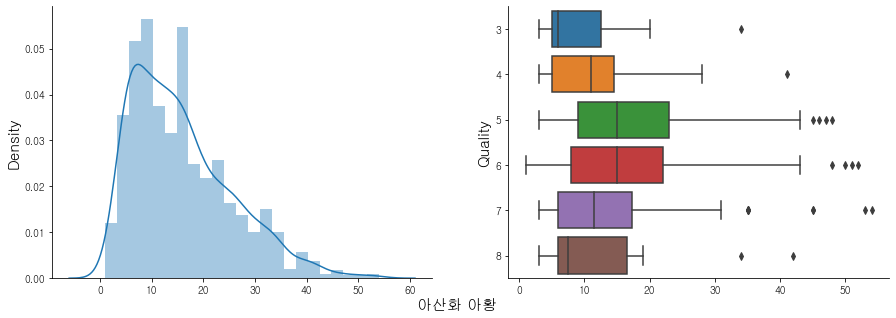

In [29]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["free_sulfur_dioxide"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="free_sulfur_dioxide", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '아산화 아황', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [30]:
remove_outlier_using_IQR(wine, "free_sulfur_dioxide")

### total.sulfur.dioxide(총 아황산가스)

In [31]:
wine["total_sulfur_dioxide"].describe()

count    1273.000000
mean       45.051060
std        30.477073
min         6.000000
25%        23.000000
50%        37.000000
75%        59.000000
max       165.000000
Name: total_sulfur_dioxide, dtype: float64

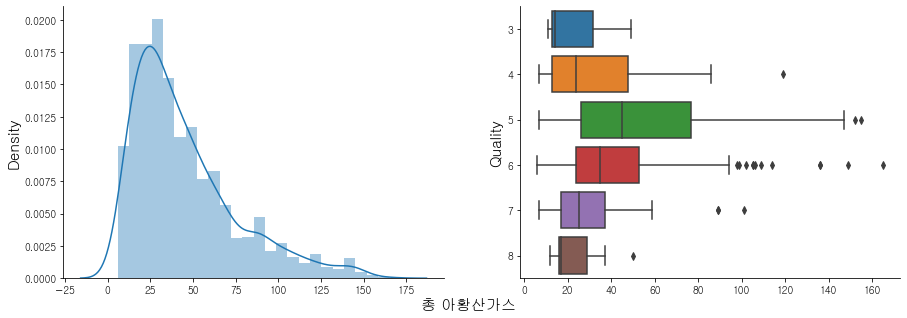

In [32]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["total_sulfur_dioxide"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="total_sulfur_dioxide", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '총 아황산가스', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [33]:
remove_outlier_using_IQR(wine, "total_sulfur_dioxide")

### density(밀도)

In [34]:
wine["density"].describe()

count    1254.000000
mean        0.996613
std         0.001609
min         0.990840
25%         0.995585
50%         0.996605
75%         0.997600
max         1.001000
Name: density, dtype: float64

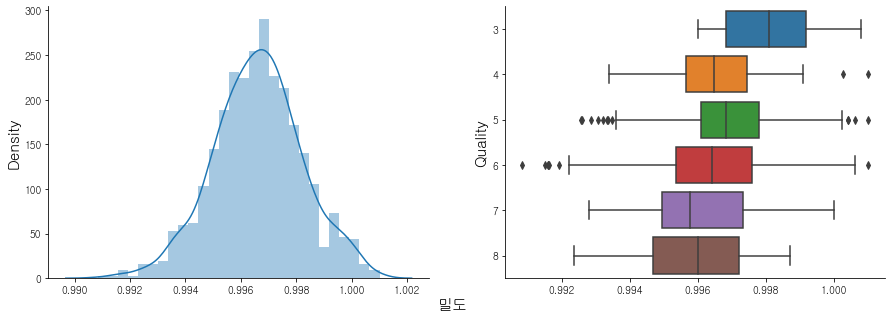

In [35]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["density"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="density", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '밀도', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [36]:
remove_outlier_using_IQR(wine, "density")

### pH

In [37]:
wine["pH"].describe()

count    1233.000000
mean        3.318670
std         0.139304
min         2.880000
25%         3.220000
50%         3.320000
75%         3.400000
max         3.900000
Name: pH, dtype: float64

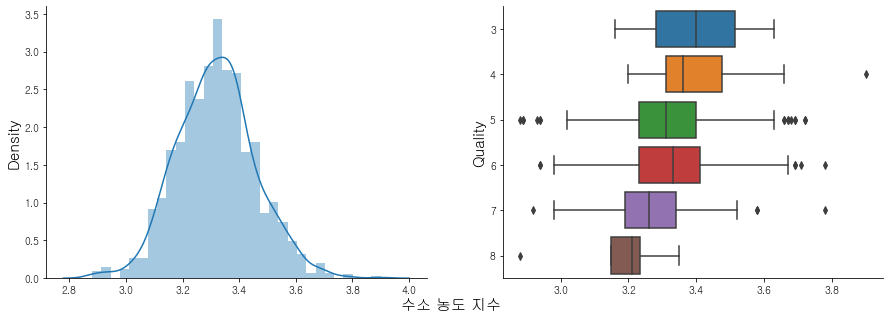

In [38]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["pH"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="pH", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '수소 농도 지수', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [39]:
remove_outlier_using_IQR(wine, "pH")

### sulphates(황산염)

In [40]:
wine["sulphates"].describe()

count    1206.000000
mean        0.638897
std         0.132537
min         0.330000
25%         0.550000
50%         0.610000
75%         0.707500
max         1.560000
Name: sulphates, dtype: float64

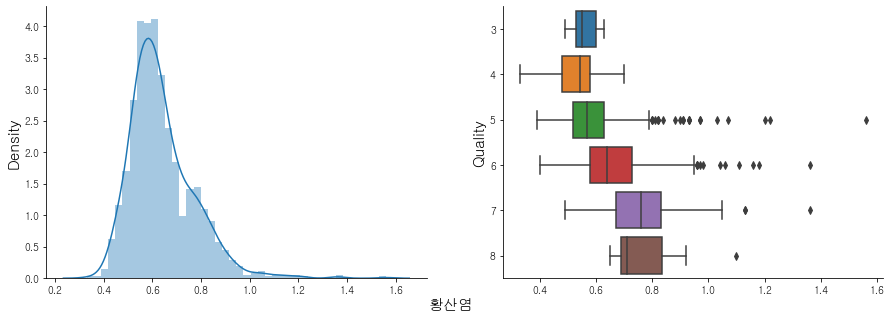

In [41]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["sulphates"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="sulphates", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '황산염', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [42]:
remove_outlier_using_IQR(wine, "pH")

### alcohol(알코올)

In [43]:
wine["alcohol"].describe()

count    1205.000000
mean       10.336169
std         0.961139
min         8.400000
25%         9.500000
50%        10.100000
75%        11.000000
max        14.000000
Name: alcohol, dtype: float64

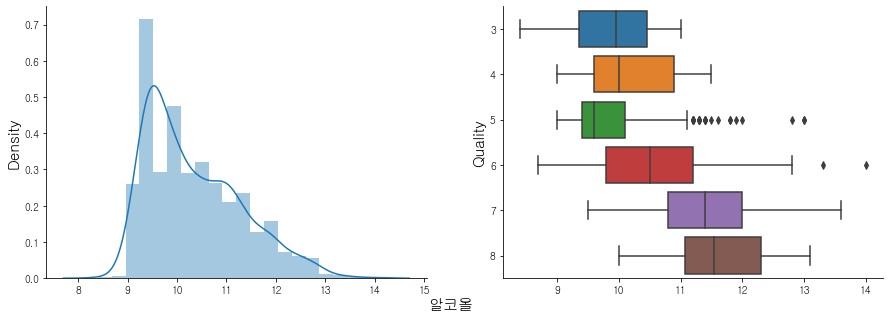

In [44]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(wine["alcohol"],ax=axes[0])
axes[0].set_xlabel(" ")
axes[0].set_ylabel("Density",size=15)

sns.boxplot(y="quality",x="alcohol", ax=axes[1],data=wine)
plt.xlabel(" ")
plt.ylabel("Quality", size=15)

fig.text(0.5, 0.04, '알코올', ha='center', size=15)

for i in range(0,2):
    for loc in [ "right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

#### 이상치 제거

In [45]:
remove_outlier_using_IQR(wine, "pH")

In [46]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1204 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1204 non-null   float64 
 1   volatile_acidity      1204 non-null   float64 
 2   citric_acid           1204 non-null   float64 
 3   residual_sugar        1204 non-null   float64 
 4   chlorides             1204 non-null   float64 
 5   free_sulfur_dioxide   1204 non-null   float64 
 6   total_sulfur_dioxide  1204 non-null   float64 
 7   density               1204 non-null   float64 
 8   pH                    1204 non-null   float64 
 9   sulphates             1204 non-null   float64 
 10  alcohol               1204 non-null   float64 
 11  quality               1204 non-null   category
dtypes: category(1), float64(11)
memory usage: 154.3 KB


quality별 확인

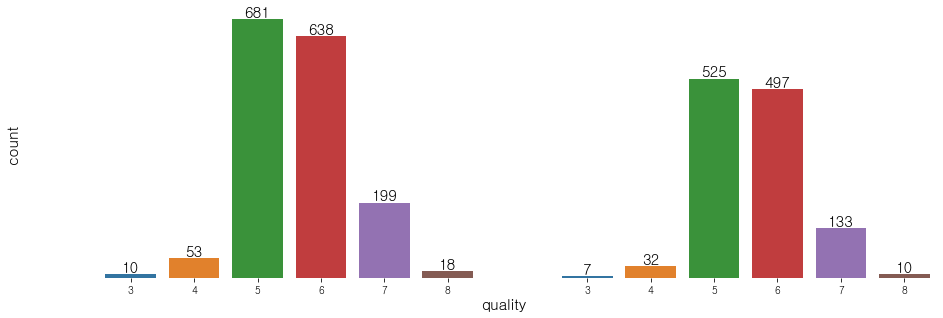

In [47]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.countplot(x="quality", data=wine_original, ax=axes[0])
for i in range(0,6):
    axes[0].annotate(str(wine_original["quality"].value_counts(sort=False)[i]), 
                 xy=(i,wine_original["quality"].value_counts(sort=False)[i]), ha='center', va='bottom', size=15)

axes[0].set_xlabel("")
axes[0].set_ylabel("")

sns.countplot(x="quality", data=wine, ax=axes[1])
for i in range(0,6):
    plt.annotate(str(wine["quality"].value_counts(sort=False)[i]), 
                 xy=(i,wine["quality"].value_counts(sort=False)[i]), ha='center', va='bottom', size=15)

plt.xlabel("")
plt.ylabel("")

fig.text(0.5, 0.04, 'quality', ha='center', size=15)
fig.text(0.04, 0.5, 'count', va='center',rotation="vertical", size=15)


for i in range(0,2):
    axes[i].axes.get_yaxis().set_visible(False)
    for loc in ["left", "right", "top", "bottom"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

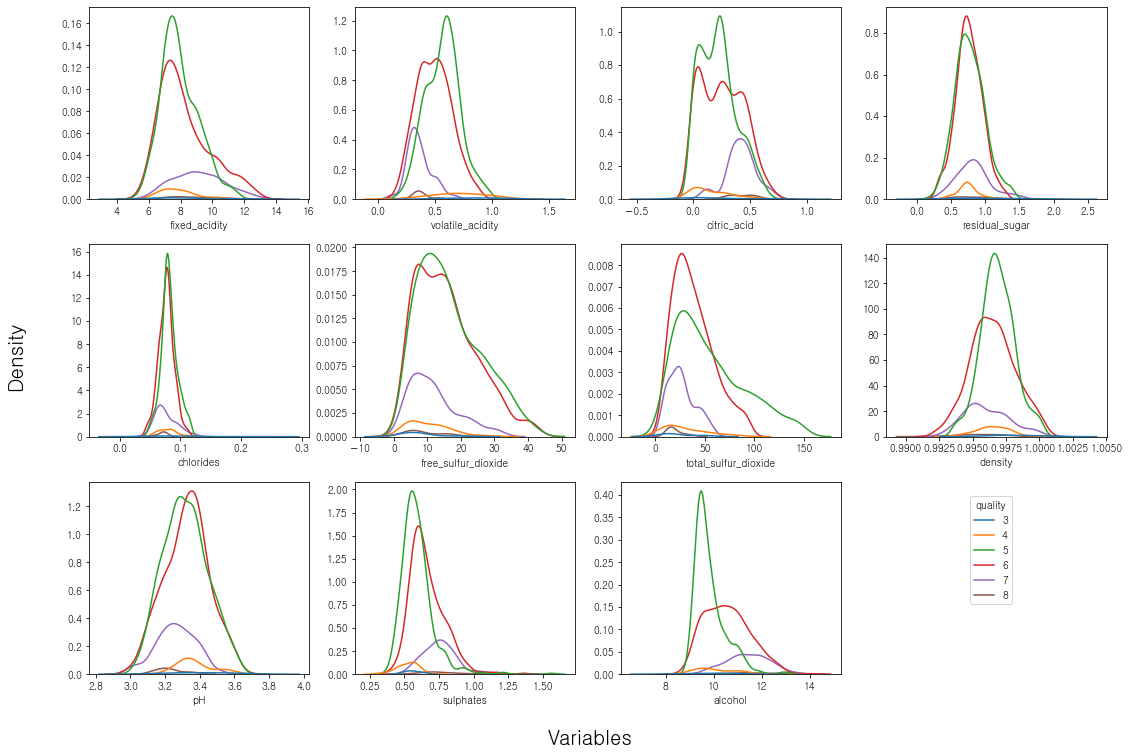

In [48]:
fig, axes = plt.subplots(3,4, figsize=(15,10))

for i in range(11):
    r=i//4; c=i%4
    sns.kdeplot(data=wine, x=wine.columns[i],  hue="quality", ax=axes[r][c])
    if i!=10:
        axes[r][c].get_legend().remove()
    axes[r][c].set_ylabel("")


fig.delaxes(axes[2][3])

fig.text(-0.04, 0.5, 'Density', va='center',rotation="vertical", size=20)
fig.text(0.5, -0.04, 'Variables', ha='center', size=20)


plt.tight_layout()
axes[2][2].legend_.set_bbox_to_anchor((1.8, 0.95))
plt.show()

# 2. Normalization

In [49]:
def standardization(x):
    m = np.mean(x, axis=0)
    s = np.std(x, axis=0)
    return (x-m)/s

In [50]:
for i in wine.columns[:-1]:
    wine[i] = standardization(wine[i])

In [51]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.562984,1.080335,-1.430100,-0.641149,-0.206025,-0.490507,-0.348736,0.770323,1.522629,-0.595282,-0.973608,5
1,-0.287190,2.159550,-1.430100,0.835721,1.322601,1.058095,0.777218,0.112455,-0.912064,0.309762,-0.557181,5
2,-0.287190,1.440073,-1.207798,0.258443,0.905703,-0.048049,0.333660,0.244029,-0.440833,0.083501,-0.557181,5
3,2.057058,-1.437833,1.682129,-0.641149,-0.275508,0.173180,0.538379,0.901897,-1.226218,-0.444441,-0.557181,6
4,-0.562984,1.080335,-1.430100,-0.641149,-0.206025,-0.490507,-0.348736,0.770323,1.522629,-0.595282,-0.973608,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.390366,0.480771,-0.985496,-0.399632,0.766737,1.832396,-0.007538,-1.137495,1.051398,-0.444441,0.171566,5
1595,-1.597211,0.180990,-0.874345,0.049140,-1.178787,2.606696,0.231301,-0.992764,1.601168,0.913125,0.900312,6
1596,-1.321417,-0.058836,-0.707618,0.258443,-0.206025,1.500552,-0.144017,-0.584885,0.815783,0.837705,0.692099,6
1597,-1.597211,0.750575,-0.763194,-0.399632,-0.275508,1.832396,-0.007538,-0.762510,1.993860,0.536023,-0.140754,5


## 상관분석

<AxesSubplot:>

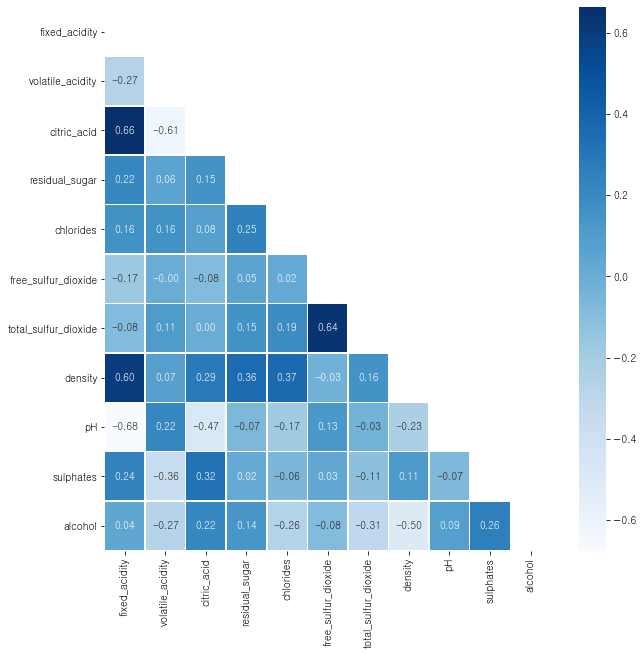

In [52]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(wine.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=wine.corr(), annot=True, fmt='0.2f', cmap="Blues", linewidths=.5, mask=mask)

### 양의 상관관계 산점도

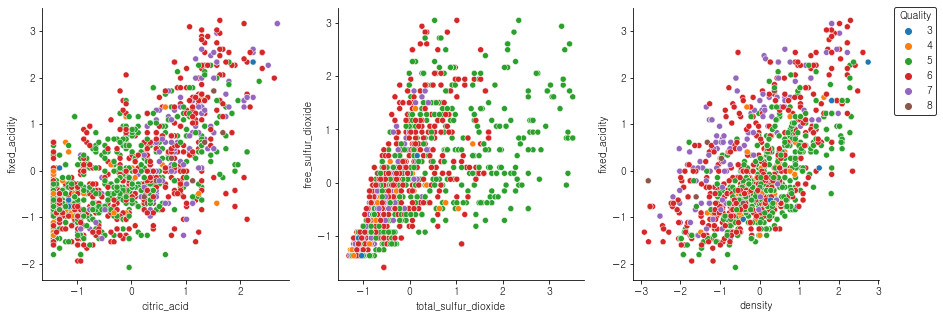

In [53]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(data=wine, x="citric_acid", y="fixed_acidity", hue="quality", ax=axes[0])
axes[0].get_legend().remove()

sns.scatterplot(data=wine, x="total_sulfur_dioxide", y="free_sulfur_dioxide", hue="quality", ax=axes[1])
axes[1].get_legend().remove()

sns.scatterplot(data=wine, x="density", y="fixed_acidity", hue="quality",  ax=axes[2])
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.805), edgecolor='k', title="Quality")

for i in range(0,3):
    for loc in ["right", "top"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

### 

### 음의 상관관계 산점도

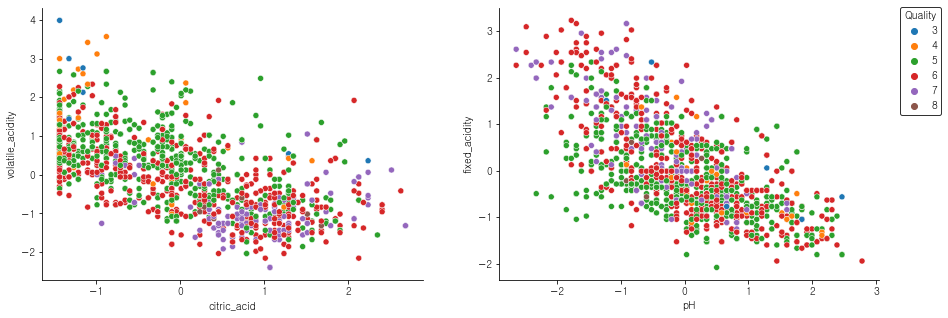

In [54]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(data=wine, x="citric_acid", y="volatile_acidity", hue="quality", ax=axes[0])
axes[0].get_legend().remove()

sns.scatterplot(data=wine, x="pH", y="fixed_acidity", hue="quality", ax=axes[1])

plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.805), edgecolor='k', title="Quality")

for i in range(0,2):
    for loc in ["right", "top"]:
        axes[i].spines[loc].set_visible(False)
        
plt.show()

# 3. Modeling
### train/test 분리
- 각 등급 별 90% = train / 10% = test

In [ ]:
np.random.seed(0)
train_idx=set()
for i in range(3,9):
    train_idx.update(np.random.choice(wine[wine.quality == i].index, int(len(wine[wine.quality == i].index)*0.9), replace=False))
test_idx = list(set(wine.index) - train_idx)
train_idx = list(train_idx)

X_train = wine_s.drop("quality", axis=1).loc[train_idx].to_numpy()
Y_train = wine_s.quality.loc[train_idx].to_numpy()
X_test = wine_s.drop("quality", axis=1).loc[test_idx].to_numpy()
Y_test = wine_s.quality.loc[test_idx].to_numpy()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)

sns.countplot(x="quality", data=wine.loc[train_idx], ax=axes[0])
for i in range(0,6):
    axes[0].annotate(str(wine["quality"].loc[train_idx].value_counts(sort=False)[i]), 
                 xy=(i,wine["quality"].loc[train_idx].value_counts(sort=False)[i]), ha='center', va='bottom', size=15)

axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_title("Train", size=20)

sns.countplot(x="quality", data=wine.loc[valid_idx], ax=axes[1])
for i in range(0,6):
    axes[1].annotate(str(wine["quality"].loc[valid_idx].value_counts(sort=False)[i]), 
                 xy=(i,wine["quality"].loc[valid_idx].value_counts(sort=False)[i]), ha='center', va='bottom', size=15)

axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].set_title("Test", size=20)


for i in range(0,2):
    axes[i].axes.get_yaxis().set_visible(False)
    for loc in ["left", "right", "top", "bottom"]:
        axes[i].spines[loc].set_visible(False)

plt.show()

### Neural Network

In [ ]:
def build_model(n_hidden_layer, n_neurons, dropout_rate=0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(11,)))
    
    for i in range(n_hidden_layer):
        model.add(tf.keras.layers.Dense(n_neurons[i], activation="relu"))
        model.add(tf.keras.layers.Dropout(dropout_rate))
        
    model.add(tf.keras.layers.Dense(6, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    
    return model

In [ ]:
n_layers = [2]
n_nodes = [4,6,8,12,16,24,32,48,64,96,128,192,256,384,512,768,1024]
top = [0,0,0]

for i in n_layers:
    p = []
    for a in range(i):
        p.append(n_nodes)
    l=list(product(*p, repeat=1))
    for k in l:
        model = build_model(i,k)
        
        hist = model.fit(X_train, Y_train-3, epochs=25, verbose=0)
        
        prediction = model.predict(X_test)
        
        Y_pred=[]
        for j in prediction:
            Y_pred.append(np.argmax(j)+3)
        acc=round(sum(Y_test==Y_pred)/len(Y_test), 3)
        
        if top[2] < acc:
            top = [i,k,acc]
            model_s_2 = model
            hist_s_2 = hist
            print(top, "train_acc :", round(hist_s_2.history["sparse_categorical_accuracy"][-1],3))

In [ ]:
top

In [ ]:
model_s_1.summary()

In [ ]:
prediction = model_s_2.predict(X_test)
Y_pred=[]
for j in prediction:
    Y_pred.append(np.argmax(j)+3)

In [ ]:
label_aux = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
cm_df = pd.DataFrame(cm,index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_df,annot=True,fmt="d", cmap = "PuRd")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [ ]:
n_layers = [3]
n_nodes = [4,8,16,32,64,128,256,512]
top = [0,0,0]

for i in n_layers:
    p = []
    for a in range(i):
        p.append(n_nodes)
    l=list(product(*p, repeat=1))
    for k in l:
        model = build_model(i,k)
        
        hist = model.fit(X_train, Y_train-3, epochs=25, verbose=0)
        
        prediction = model.predict(X_test)
        
        Y_pred=[]
        for j in prediction:
            Y_pred.append(np.argmax(j)+3)
        acc=round(sum(Y_test==Y_pred)/len(Y_test), 3)
        
        if top[2] < acc:
            top = [i,k,acc]
            model_s_3 = model
            hist_s_3 = hist
            print(top, "train_acc :", round(hist_s_3.history["sparse_categorical_accuracy"][-1],3))

In [ ]:
model_s_3.summary()

In [ ]:
top

In [ ]:
prediction = model_s_3.predict(X_test)
Y_pred=[]
for j in prediction:
    Y_pred.append(np.argmax(j)+3)

label_aux = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
cm_df = pd.DataFrame(cm,index = ['3','4','5','6','7','8'], columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_df,annot=True,fmt="d", cmap = "PuRd")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [ ]:
prediction = model_s_2.predict(X_test)
Y_pred_2=[]
for j in prediction:
    Y_pred_2.append(np.argmax(j)+3)

prediction = model_s_3.predict(X_test)
Y_pred_3=[]
for j in prediction:
    Y_pred_3.append(np.argmax(j)+3)
a=(Y_test == Y_pred_2) + (Y_test == Y_pred_3)

sum(a)/len(a)

### T-SNE

In [ ]:
tsne = TSNE(random_state=0)

t = tsne.fit_transform(wine_s.iloc[:,0:11])

t_df = pd.DataFrame(t)
t_df = t_df.set_index(wine_s.index)
t_df = pd.concat([t_df, pd.DataFrame(wine_s["quality"])], axis=1)

sns.scatterplot(x=t_df[0], y=t_df[1], hue = "quality", data = t_df)
plt.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.76), edgecolor='k', title="Quality")
plt.show()

In [ ]:
print("quality==8 인 개수 :", len(wine[wine.quality == 8]))

In [ ]:
np.random.seed(0)
idx = np.random.choice(wine[wine.quality == 8].index, 1)[0]

dist = []
for i in wine.index:
    if i==idx:
        continue
    dist.append([sum((wine.drop("quality", axis=1).loc[idx] - wine.drop("quality", axis=1).loc[i])**2)**(1/2),wine.quality.loc[i]])
    
dist.sort()
dist[0:10]

In [ ]:
print("quality==3 인 개수 :", len(wine[wine.quality == 3]))

In [ ]:
np.random.seed(0)
idx = np.random.choice(wine[wine.quality == 3].index, 1)[0]

dist = []
for i in wine.index:
    if i==idx:
        continue
    dist.append([sum((wine.drop("quality", axis=1).loc[idx] - wine.drop("quality", axis=1).loc[i])**2)**(1/2),wine.quality.loc[i]])
    
dist.sort()
dist[0:10]

### 정규화

In [ ]:
def normalization(x):
    ma = np.max(x)
    mi = np.min(x)
    return (x-mi)/(ma-mi)


wine_n = wine.copy()
for i in wine.columns[:-1]:
    wine_n[i] = normalization(wine[i])
df = pd.DataFrame(wine_n.drop(columns=["quality","density"]).sum(axis=1), columns=["sum"])
wine_n=pd.concat([wine_n, df], axis=1)
for i in range(11):
    if i==7:
        continue
    colname = wine_n.columns[i] + '_p'
    df = wine_n[wine_n.columns[i]]/wine_n["sum"]
    df = pd.DataFrame(df, columns=[colname])
    wine_n=pd.concat([wine_n, df], axis=1)

In [ ]:
wine_n

In [ ]:
wine.drop("quality", axis=1).loc[idx]